In [1]:
using SparseIR
using Plots
gr() # USE GR backend
using OMEinsum
using LaTeXStrings

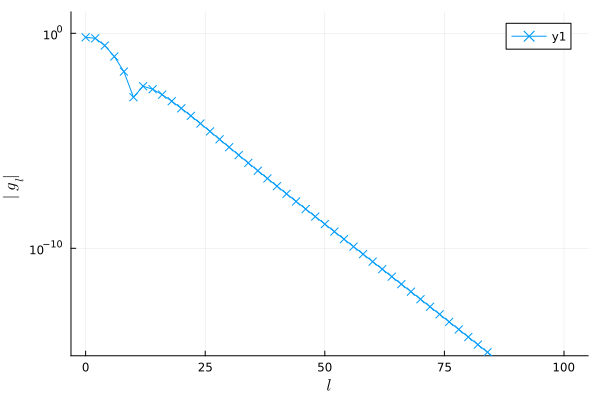

In [2]:
function rho(omega)
    return abs.(omega) < 1 ? (2/π) .* sqrt.(1-omega^2) : 0.0
end

beta = 10000.0
wmax = 1.0
eps = 1e-15 # cutoff for SVD
basis = FiniteTempBasis(Fermionic(), beta, wmax, eps)

rhol = overlap(basis.v, rho, -wmax, wmax)
gl = - basis.s .* rhol

ls = collect(0:length(basis)-1)
p = plot(marker=:x, yaxis=:log, ylabel=L"|g_l|", xlabel=L"l", ylims=(1e-15,10))
plot!(p, ls[1:2:end], abs.(gl[1:2:end]), marker=:x, yaxis=:log, ylabel=L"|g_l|", xlabel=L"l")

In [3]:
smpl_tau = TauSampling(basis)
println("sampling times: ", smpl_tau.sampling_points)
println("Condition number: ", SparseIR.cond(smpl_tau))

sampling times: 

[-4776.409486578611, -4333.600190763889, -3903.489199194745, -3493.245653743826, -3108.383597604443, -2752.5682814454813, -2427.695275407337, -2134.1542045122974, -1871.177146717915, -1637.191623041102, -1430.1294543119957, -1247.6709717638912, -1087.4231696403858, -947.0404299720082, -824.2999960143404, -717.1441939083734, -623.6995557013647, -542.2807084296066, -471.38476923572756, -409.6802519273501, -355.9931760732771, -309.2921218873168, -268.6733148680698, -233.34637878568486, -202.62110258773114, -175.895379252628, -152.64435851651936, -132.41078679801288, -114.79647003097338, -99.45477716380103, -86.08409590177001, -74.42215209472636, -64.24110556933593, -55.34333491259758, -47.557820265420325, -40.737027934796274, -34.754197984991904, -29.50094144826054, -24.88507029347886, -20.828608291441064, -17.26595749197979, -14.14221593762588, -11.41165361439711, -9.036355822161779, -6.985039124735026, -5.2320383801574, -3.7564568454939717, -2.5414665603407105, -1.573743570455477, -0.84

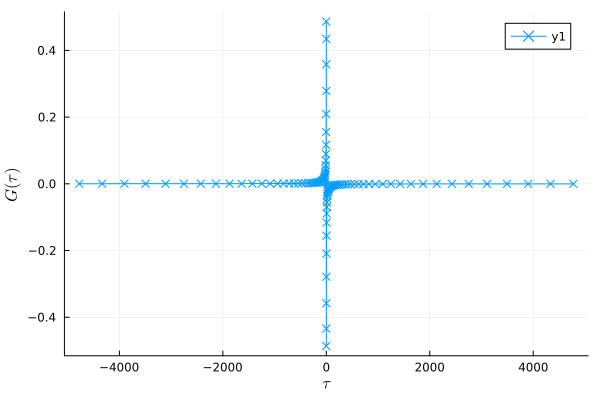

In [4]:
# Evaluate G(τ) on the sampling times
gtau_smpl = evaluate(smpl_tau, gl)

plot(smpl_tau.sampling_points, gtau_smpl, marker=:x, xlabel=L"\tau", ylabel=L"G(\tau)")


In [5]:
# Fit G(τ) on the sampling times
gl_reconst_from_tau = fit(smpl_tau, gtau_smpl)

104-element Vector{Float64}:
 -0.650908727340739
 -1.338225836712941e-15
 -0.5874748878888262
  1.3695074512696427e-15
 -0.26969535847287207
 -1.9578894941739274e-15
 -0.0835854838782452
  1.9272339873209483e-15
 -0.016527848807111743
 -1.729808707768798e-15
  0.0010656038792227435
  8.291129978211573e-16
  0.0034739976272110716
  ⋮
  3.2770100572267654e-15
  1.3402349443904298e-15
 -1.2498256757532159e-15
 -4.685982175431994e-16
 -1.2646059134169163e-17
 -8.894144560217121e-16
  2.6201674318333993e-15
  6.566518723049898e-16
 -1.6388828778699829e-15
  3.3961263499320843e-16
  1.6368816880478648e-16
 -3.919841327018492e-15

In [6]:
smpl_matsu = MatsubaraSampling(basis)
println("sampling frequencies: ", smpl_matsu.sampling_points)
println("Condition number: ", SparseIR.cond(smpl_matsu))

sampling frequencies: FermionicFreq

[FermionicFreq(-44377), FermionicFreq(-14981), FermionicFreq(-8743), FermionicFreq(-6213), FermionicFreq(-4765), FermionicFreq(-3733), FermionicFreq(-3089), FermionicFreq(-2523), FermionicFreq(-2093), FermionicFreq(-1797), FermionicFreq(-1513), FermionicFreq(-1315), FermionicFreq(-1117), FermionicFreq(-975), FermionicFreq(-859), FermionicFreq(-729), FermionicFreq(-623), FermionicFreq(-547), FermionicFreq(-469), FermionicFreq(-411), FermionicFreq(-361), FermionicFreq(-309), FermionicFreq(-267), FermionicFreq(-233), FermionicFreq(-205), FermionicFreq(-177), FermionicFreq(-153), FermionicFreq(-133), FermionicFreq(-115), FermionicFreq(-101), FermionicFreq(-87), FermionicFreq(-75), FermionicFreq(-65), FermionicFreq(-57), FermionicFreq(-49), FermionicFreq(-43), FermionicFreq(-37), FermionicFreq(-33), FermionicFreq(-29), FermionicFreq(-25), FermionicFreq(-23), FermionicFreq(-21), FermionicFreq(-19), FermionicFreq(-17), FermionicFreq(-15), FermionicFreq(-13), FermionicFreq(-11), FermionicFreq(

210.8802635675065


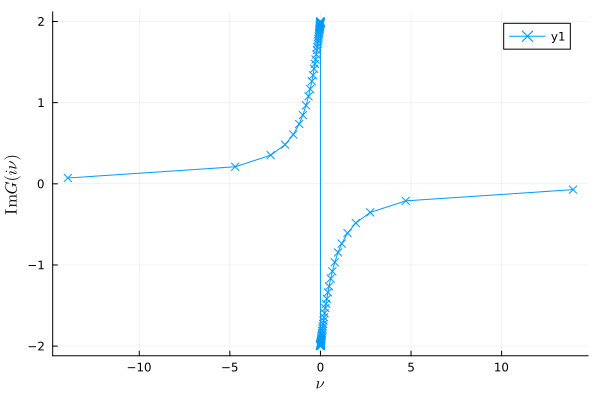

In [7]:
# Evaluate G(iv) on the sampling frequencies
giv_smpl = evaluate(smpl_matsu, gl)

# `value` function evaluate the actual values of Matsubara frequencies
plot(SparseIR.value.(smpl_matsu.ωn, beta), imag.(giv_smpl), marker=:x, xlabel=L"\nu", ylabel=L"\mathrm{Im} G(i\nu)")

In [8]:
# Fit G(τ) on the sampling times
gl_reconst_from_matsu = fit(smpl_matsu, giv_smpl)

104-element Vector{Float64}:
 -0.6509087273407396
  5.696809823311181e-17
 -0.5874748878888254
 -1.9424372960240556e-17
 -0.2696953584728692
  9.545156116936036e-18
 -0.08358548387824333
 -1.553568520472352e-17
 -0.01652784880710962
  2.6881129533915344e-17
  0.0010656038792250314
 -8.644305416405723e-18
  0.003473997627211692
  ⋮
  1.4623718902484484e-15
  6.331295039952252e-18
  1.2750217548429532e-15
 -2.8552898099140756e-18
  1.5846698953048133e-15
 -4.0291256253345e-18
  1.4623718902484484e-15
  4.793136846831369e-18
  1.4324479102878485e-15
 -9.498850162071637e-19
  7.825771281000371e-16
 -8.066482798586065e-18

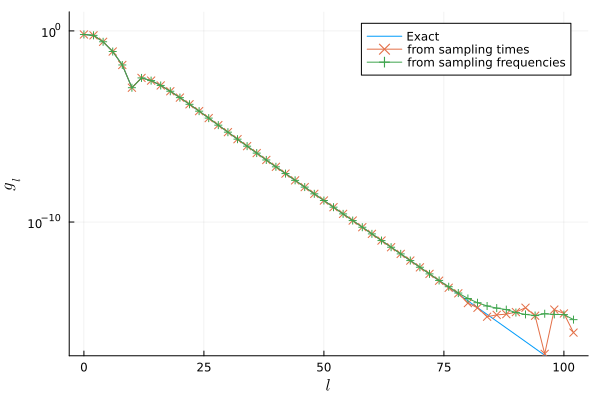

In [9]:
p = plot(xlabel=L"l", ylabel=L"g_l", ylims=(1e-17, 10), yaxis=:log)
plot!(p, ls[1:2:end], abs.(gl[1:2:end]), marker=:none, label="Exact")
plot!(p, ls[1:2:end], abs.(gl_reconst_from_tau[1:2:end]), marker=:x, label="from sampling times")
plot!(p, ls[1:2:end], abs.(gl_reconst_from_matsu[1:2:end]), marker=:+, label="from sampling frequencies")

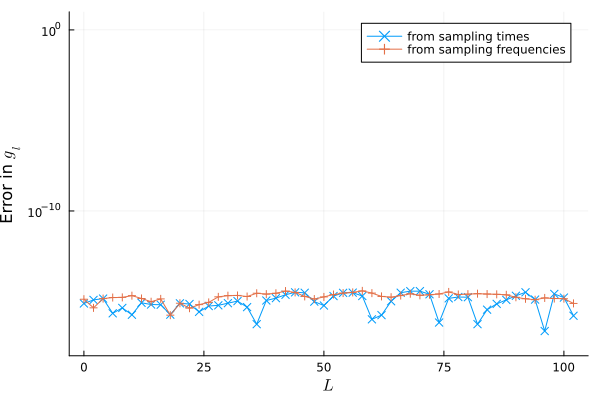

In [10]:
p = plot(xlabel=L"L", ylabel=L"Error in $g_l$", ylims=(1e-18, 10), yaxis=:log)
plot!(p, ls[1:2:end], abs.((gl_reconst_from_tau-gl)[1:2:end]), marker=:x, label="from sampling times")
plot!(p, ls[1:2:end], abs.((gl_reconst_from_matsu-gl)[1:2:end]), marker=:+, label="from sampling frequencies")